In [29]:
%cd /data/codes/prep_ps_pykaldi/
import pandas as pd
import numpy as np
import torch
import pickle
import json
import re

/data/codes/prep_ps_pykaldi


In [30]:
MAX_LENGTH = 64

metadata_path = "/data/codes/prep_ps_pykaldi/prep_data/jsonl_v1/info_in_domain_long_sentence_testset_old.jsonl"
align_path = "/data/codes/prep_ps_pykaldi/exp/sm/prep/merged_align.out"
gop_path = '/data/codes/prep_ps_pykaldi/exp/sm/prep/merged_gop.pkl'
out_dir = "/data/codes/prep_ps_pykaldi/exp/sm/prep"

In [31]:
def load_jsonl(path):
    with open(path, "r", encoding="utf-8") as f:
        lines = f.readlines()
        lines = [json.loads(line.strip()) for line in lines]
    
    lines = pd.DataFrame(lines)
    return lines

metadata = load_jsonl(metadata_path)
metadata.head(2)

,uid,id,qid,text,arpas,phone_scores,word_ids,trans,word_scores,utterance_scores
0,144801.0,4141169,67632,I THINK PORTRAITS ARE MORE BEAUTIFUL WHEN THEY...,"[AY1, TH, IH1, NG, K, P, AO1, R, T, R, AH0, T,...","[100, 97, 96, 99, 82, 100, 10, 17, 95, 96, 0, ...","[0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, ...","[AY, TH, IH, NG, K, P, AA, R, T, R, IY, T, S, ...","[92, 90, 35, 90, 92, 36, 92, 92, 66, 92, 92]",66.63
1,98397.0,4145212,67393,SHE HAS A SOFT VOICE,"[SH, IY1, HH, AE1, Z, AH0, S, AA1, F, T, V, OY...","[100, 100, 98, 96, 32, 100, 97, 48, 89, 100, 9...","[0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 4, 4, 4]","[SH, IY, HH, AE, S, SCHWA, S, ER, F, T, V, OY, S]","[97, 64, 97, 75, 94]",84.24


In [32]:
with open(gop_path, 'rb') as f:
    gop_features = pickle.load(f)
    
metadata = metadata[metadata.id.isin(gop_features)]
metadata.head(2)

,uid,id,qid,text,arpas,phone_scores,word_ids,trans,word_scores,utterance_scores
0,144801.0,4141169,67632,I THINK PORTRAITS ARE MORE BEAUTIFUL WHEN THEY...,"[AY1, TH, IH1, NG, K, P, AO1, R, T, R, AH0, T,...","[100, 97, 96, 99, 82, 100, 10, 17, 95, 96, 0, ...","[0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, ...","[AY, TH, IH, NG, K, P, AA, R, T, R, IY, T, S, ...","[92, 90, 35, 90, 92, 36, 92, 92, 66, 92, 92]",66.63
1,98397.0,4145212,67393,SHE HAS A SOFT VOICE,"[SH, IY1, HH, AE1, Z, AH0, S, AA1, F, T, V, OY...","[100, 100, 98, 96, 32, 100, 97, 48, 89, 100, 9...","[0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 4, 4, 4]","[SH, IY, HH, AE, S, SCHWA, S, ER, F, T, V, OY, S]","[97, 64, 97, 75, 94]",84.24


In [33]:
def extract_gop_feature(id):
    sample = gop_features[str(id)]
    features = [
        np.array(feature) for feature, phoneme in zip(sample["gopt"], sample["phones"][0])
        if phoneme != "SIL"
    ]
    return np.stack(features)

def extract_phonemes(id):
    sample = gop_features[str(id)]
    phonemes = [
        re.sub("\d", "",phoneme.split("_")[0]) for phoneme in sample["phones"][0]
        if phoneme != "SIL"
    ]
    return phonemes

metadata["features"] = metadata.id.apply(lambda x: extract_gop_feature(x))
metadata["kaldi_phoneme"] = metadata.id.apply(lambda x: extract_phonemes(x))
metadata.head(2)

,uid,id,qid,text,arpas,phone_scores,word_ids,trans,word_scores,utterance_scores,features,kaldi_phoneme
0,144801.0,4141169,67632,I THINK PORTRAITS ARE MORE BEAUTIFUL WHEN THEY...,"[AY1, TH, IH1, NG, K, P, AO1, R, T, R, AH0, T,...","[100, 97, 96, 99, 82, 100, 10, 17, 95, 96, 0, ...","[0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, ...","[AY, TH, IH, NG, K, P, AA, R, T, R, IY, T, S, ...","[92, 90, 35, 90, 92, 36, 92, 92, 66, 92, 92]",66.63,"[[-7.036007999373453, -6.696772841758492, -3.3...","[AY, TH, IH, NG, K, P, AO, R, T, R, AH, T, S, ..."
1,98397.0,4145212,67393,SHE HAS A SOFT VOICE,"[SH, IY1, HH, AE1, Z, AH0, S, AA1, F, T, V, OY...","[100, 100, 98, 96, 32, 100, 97, 48, 89, 100, 9...","[0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 4, 4, 4]","[SH, IY, HH, AE, S, SCHWA, S, ER, F, T, V, OY, S]","[97, 64, 97, 75, 94]",84.24,"[[-7.743860181416019, -5.810622266743849, -3.9...","[SH, IY, HH, AE, Z, AH, S, AO, F, T, V, OY, S]"


In [34]:
align_df = pd.read_csv(align_path, names=["id", "alignment"], sep="\t")

def extract_duration(alignment):
    alignment = json.loads(alignment)
    durations = []
    
    for phoneme, start, duration in alignment:
        if phoneme == "SIL":
            continue
        durations.append(round(duration * 0.02, 4))

    return durations

def extract_phonemes(alignment):
    alignment = json.loads(alignment)
    phonemes = []
    
    for phoneme, start, duration in alignment:
        if phoneme == "SIL":
            continue
        phonemes.append(phoneme.split("_")[0])

    return phonemes

align_df["durations"] = align_df["alignment"].apply(lambda x: extract_duration(x))
align_df["phonemes"] = align_df["alignment"].apply(lambda x: extract_phonemes(x))
align_df["id"] = align_df["id"].apply(str)
align_df.head(2)

,id,alignment,durations,phonemes
0,4243017,"[[""SIL"", 0, 78], [""W_B"", 78, 12], [""IY1_E"", 90...","[0.24, 0.18, 0.18, 0.32, 0.2, 0.22, 0.2, 0.18,...","[W, IY1, HH, AE1, D, AH0, HH, AE1, P, IY0, HH,..."
1,1641228,"[[""SIL"", 0, 36], [""L_B"", 36, 13], [""EH1_I"", 49...","[0.26, 0.24, 0.16, 0.16, 0.32, 0.28, 0.46, 0.1...","[L, EH1, T, M, AY1, HH, EH1, R, D, AW1, N]"


In [35]:
metadata = pd.merge(metadata, align_df[["id", "durations", "alignment"]], how="left", on="id")
metadata.head(2)

,uid,id,qid,text,arpas,phone_scores,word_ids,trans,word_scores,utterance_scores,features,kaldi_phoneme,durations,alignment
0,144801.0,4141169,67632,I THINK PORTRAITS ARE MORE BEAUTIFUL WHEN THEY...,"[AY1, TH, IH1, NG, K, P, AO1, R, T, R, AH0, T,...","[100, 97, 96, 99, 82, 100, 10, 17, 95, 96, 0, ...","[0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, ...","[AY, TH, IH, NG, K, P, AA, R, T, R, IY, T, S, ...","[92, 90, 35, 90, 92, 36, 92, 92, 66, 92, 92]",66.63,"[[-7.036007999373453, -6.696772841758492, -3.3...","[AY, TH, IH, NG, K, P, AO, R, T, R, AH, T, S, ...","[0.58, 0.46, 0.26, 0.34, 0.24, 0.3, 0.24, 0.1,...","[[""SIL"", 0, 53], [""AY1_S"", 53, 29], [""TH_B"", 8..."
1,98397.0,4145212,67393,SHE HAS A SOFT VOICE,"[SH, IY1, HH, AE1, Z, AH0, S, AA1, F, T, V, OY...","[100, 100, 98, 96, 32, 100, 97, 48, 89, 100, 9...","[0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 4, 4, 4]","[SH, IY, HH, AE, S, SCHWA, S, ER, F, T, V, OY, S]","[97, 64, 97, 75, 94]",84.24,"[[-7.743860181416019, -5.810622266743849, -3.9...","[SH, IY, HH, AE, Z, AH, S, AO, F, T, V, OY, S]","[0.56, 0.24, 0.18, 0.42, 0.76, 0.16, 0.4, 0.34...","[[""SIL"", 0, 30], [""SH_B"", 30, 28], [""IY1_E"", 5..."


<Axes: >

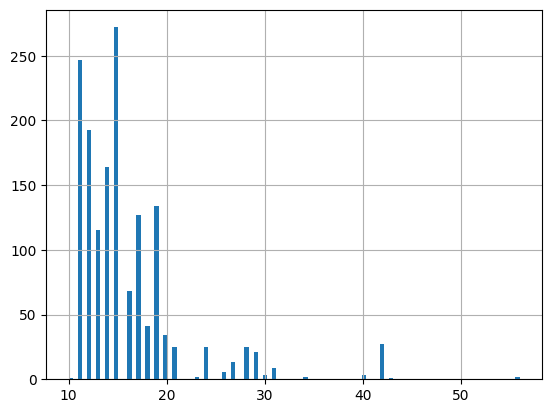

In [36]:
metadata["length"] = metadata["arpas"].apply(len)
metadata["length"].hist(bins=100)

### Extract sentence scores

In [37]:
sentence_scores = []

for index in metadata.index:
    sentence_score = metadata["utterance_scores"][index].copy()

    sentence_scores.append(sentence_score)

sentence_scores = torch.tensor(sentence_scores)
sentence_scores = sentence_scores.numpy()
print(sentence_scores.shape)
np.save(f'{out_dir}/sentence_scores.npy', sentence_scores)
sentence_scores = None

(1560,)


### Extract word scores

In [38]:
word_scores = []

for index in metadata.index:
    word_score = metadata["word_scores"][index].copy()
    word_id = metadata["word_ids"][index].copy()

    word_score_in_phone_levels = []
    for wid in word_id:
        word_score_in_phone_levels.append(word_score[wid])

    padding = [-1,]*(MAX_LENGTH-len(word_score_in_phone_levels))
    word_score_in_phone_levels = word_score_in_phone_levels + padding
    word_score_in_phone_levels = torch.tensor(word_score_in_phone_levels)
    word_scores.append(word_score_in_phone_levels)

word_scores = torch.stack(word_scores, dim=0)
word_scores = word_scores.numpy()
print(word_scores.shape)
np.save(f'{out_dir}/word_scores.npy', word_scores)
word_scores = None

(1560, 64)


### Extract word ids

In [39]:
word_ids = []

for index in metadata.index:
    word_id = metadata["word_ids"][index].copy()

    padding = [-1,]*(MAX_LENGTH-len(word_id))
    word_id = word_id + padding
    word_id = torch.tensor(word_id)
    word_ids.append(word_id)

word_ids = torch.stack(word_ids, dim=0)
word_ids = word_ids.numpy()
print(word_ids.shape)
np.save(f'{out_dir}/word_ids.npy', word_ids)
word_ids = None

(1560, 64)


### Extract gop

In [40]:
gops = []

for index in metadata.index:
    gop = metadata["features"][index].copy()

    padding = [[0,]*len(gop[0]),]*(MAX_LENGTH-len(gop))
    gop = gop.tolist() + padding
    gop = torch.tensor(gop)
    gops.append(gop)

gops = torch.stack(gops, dim=0)
gops = gops.numpy()
print(gops.shape)
np.save(f'{out_dir}/gop.npy', gops)
gops = None

(1560, 64, 82)


### Extract duration

In [41]:
durations = []

for index in metadata.index:
    duration = metadata["durations"][index].copy()

    padding = [0, ]*(MAX_LENGTH-len(duration))

    duration += padding
    duration = torch.tensor(duration)
    durations.append(duration)

durations = torch.stack(durations, dim=0)
durations = durations.numpy()
np.save(f'{out_dir}/duration.npy', durations)
durations = None

### Extract phone scores

In [42]:
phone_scores = []

for index in metadata.index:
    phone_score = metadata["phone_scores"][index].copy()

    padding = [-1, ]*(MAX_LENGTH-len(phone_score))

    phone_score += padding
    phone_score = torch.tensor(phone_score)
    phone_scores.append(phone_score)

phone_scores = torch.stack(phone_scores, dim=0)
phone_scores = phone_scores.numpy()
np.save(f'{out_dir}/phone_scores.npy', phone_scores)
phone_scores = None

### Extract phone ids

In [43]:
phone_dict_path =  "/data/codes/prep_ps_pykaldi/resources/phone_dict.json"
with open(phone_dict_path, "r", encoding="utf-8") as f:
    phone_dict = json.load(f)

In [44]:
phone_ids = []

pad_token_id = phone_dict["PAD"]
for index in metadata.index:
    phoneme = metadata["arpas"][index].copy()

    phoneme = [re.sub("\d", "", phn) for phn in phoneme]
    phoneme = [phone_dict[phn] for phn in phoneme]
    padding = [pad_token_id, ]*(MAX_LENGTH-len(phoneme))

    phoneme += padding
    phone_ids.append(torch.tensor(phoneme))

phone_ids = torch.stack(phone_ids, dim=0)
phone_ids = phone_ids.numpy()
np.save(f'{out_dir}/phone_ids.npy', phone_ids)
phone_ids = None

### Extract WavLM Feature

In [45]:
%cd /data/codes/prep_ps_pykaldi/wavlm
import torch
from wavlm import WavLM, WavLMConfig
from tqdm import tqdm
import librosa
import pandas as pd
import json

/data/codes/prep_ps_pykaldi/wavlm


In [46]:
pretrained_path = "/data/codes/prep_ps_pykaldi/pretrained/wavlm-base+.pt"
checkpoint = torch.load(pretrained_path)

config = WavLMConfig(checkpoint['cfg'])
model = WavLM(config).eval().cuda()
model.load_state_dict(checkpoint['model'])

<All keys matched successfully>

In [47]:
def extract_feature(alignment, features):
    index = 0
    phonemes = []
    indices = -1 * torch.ones(alignment[-1][1] + alignment[-1][2])
    for phoneme, start_frame, duration in alignment:
        if phoneme == "SIL":
            continue
        end_frame = start_frame + duration
        indices[start_frame:end_frame] = index
        phonemes.append(phoneme)
        index += 1

    indices[indices==-1] = indices.max() + 1

    indices = torch.nn.functional.one_hot(indices.long(), num_classes=int(indices.max().item())+1).cuda()
    indices = indices / indices.sum(0, keepdim=True)
    
    if features.shape[0] != indices.shape[0]:
        features = features[0:indices.shape[0]]
    features = torch.matmul(indices.transpose(0, 1), features)

    return features[:-1].cpu(), phonemes

In [48]:
wav_dir = "/data/codes/prep_ps_pykaldi/prep_data/wav"

wavlm_features = []
for index in tqdm(metadata.index):
    wav_id = metadata["id"][index]
    alignment = metadata["alignment"][index]

    alignment = json.loads(alignment)
    wav, sr = librosa.load(f'{wav_dir}/{wav_id}.wav', sr=16000)

    input_values = torch.from_numpy(wav).unsqueeze(0).cuda()
    with torch.no_grad():
        features = model.extract_features(input_values)[0]

    index = torch.arange(features.shape[1]).unsqueeze(-1).cuda()
    expanded_index = index.expand((-1, 2)).flatten()
    features = features[0][expanded_index]

    features, phonemes = extract_feature(alignment, features)

    features = torch.concat([features, torch.zeros(MAX_LENGTH-len(phonemes), 768)], axis=0)
    wavlm_features.append(features)

wavlm_features = torch.stack(wavlm_features, dim=0)
wavlm_features = wavlm_features.numpy()
np.save(f'{out_dir}/wavlm_features.npy', wavlm_features)
wavlm_features = None

  0%|          | 0/1560 [00:00<?, ?it/s]

100%|██████████| 1560/1560 [00:11<00:00, 134.18it/s]


### Extract Hubert Feature

In [49]:
from transformers import AutoProcessor, HubertModel
from datasets import load_dataset
import soundfile as sf
import torch
from tqdm import tqdm
import librosa
import pandas as pd
import json

In [50]:
processor = AutoProcessor.from_pretrained("facebook/hubert-large-ls960-ft")
model = HubertModel.from_pretrained("facebook/hubert-large-ls960-ft").eval().cuda()

In [51]:
def extract_feature(alignment, features):
    index = 0
    phonemes = []
    indices = -1 * torch.ones(alignment[-1][1] + alignment[-1][2])
    for phoneme, start_frame, duration in alignment:
        if phoneme == "SIL":
            continue
        end_frame = start_frame + duration
        indices[start_frame:end_frame] = index
        phonemes.append(phoneme)
        index += 1

    indices[indices==-1] = indices.max() + 1

    indices = torch.nn.functional.one_hot(indices.long(), num_classes=int(indices.max().item())+1).cuda()
    indices = indices / indices.sum(0, keepdim=True)
    
    if features.shape[0] != indices.shape[0]:
        print(features.shape, indices.shape)
        features = features[0:indices.shape[0]]
    features = torch.matmul(indices.transpose(0, 1), features)

    return features[:-1].cpu(), phonemes

In [52]:
wav_dir = "/data/codes/prep_ps_pykaldi/prep_data/wav"

hubert_features = []
for index in tqdm(metadata.index):
    wav_id = metadata["id"][index]
    alignment = metadata["alignment"][index]

    alignment = json.loads(alignment)
    wav, sr = librosa.load(f'{wav_dir}/{wav_id}.wav', sr=16000)

    with torch.no_grad():
        features = processor(wav, return_tensors="pt", sampling_rate=16000)
        features = model(features["input_values"].cuda()).last_hidden_state

    index = torch.arange(features.shape[1]).unsqueeze(-1).cuda()
    expanded_index = index.expand((-1, 2)).flatten()
    features = features[0][expanded_index]

    features, phonemes = extract_feature(alignment, features)

    features = torch.concat([features, torch.zeros(MAX_LENGTH-len(phonemes), 1024)], axis=0)
    hubert_features.append(features)

hubert_features = torch.stack(hubert_features, dim=0)
hubert_features = hubert_features.numpy()
# np.save(f'{out_dir}/hubert_features.npy', hubert_features)
hubert_features = None

  1%|▏         | 22/1560 [00:00<00:14, 109.07it/s]

torch.Size([852, 1024]) torch.Size([851, 43])
torch.Size([398, 1024]) torch.Size([397, 14])
torch.Size([246, 1024]) torch.Size([245, 12])
torch.Size([246, 1024]) torch.Size([245, 12])
torch.Size([246, 1024]) torch.Size([245, 12])
torch.Size([204, 1024]) torch.Size([203, 15])
torch.Size([170, 1024]) torch.Size([169, 13])
torch.Size([298, 1024]) torch.Size([297, 21])
torch.Size([332, 1024]) torch.Size([331, 15])
torch.Size([434, 1024]) torch.Size([433, 14])
torch.Size([400, 1024]) torch.Size([399, 19])
torch.Size([668, 1024]) torch.Size([667, 22])


  2%|▏         | 33/1560 [00:00<00:16, 93.47it/s] 

torch.Size([1296, 1024]) torch.Size([1295, 18])
torch.Size([494, 1024]) torch.Size([493, 17])
torch.Size([306, 1024]) torch.Size([305, 17])
torch.Size([272, 1024]) torch.Size([271, 17])
torch.Size([630, 1024]) torch.Size([629, 20])
torch.Size([562, 1024]) torch.Size([561, 43])
torch.Size([264, 1024]) torch.Size([263, 15])
torch.Size([238, 1024]) torch.Size([237, 16])
torch.Size([272, 1024]) torch.Size([271, 16])
torch.Size([400, 1024]) torch.Size([399, 17])
torch.Size([460, 1024]) torch.Size([459, 14])


  3%|▎         | 54/1560 [00:00<00:15, 95.63it/s]

torch.Size([400, 1024]) torch.Size([399, 14])
torch.Size([392, 1024]) torch.Size([391, 15])
torch.Size([272, 1024]) torch.Size([271, 20])
torch.Size([434, 1024]) torch.Size([433, 29])
torch.Size([328, 1024]) torch.Size([327, 17])
torch.Size([300, 1024]) torch.Size([299, 18])
torch.Size([366, 1024]) torch.Size([365, 12])
torch.Size([426, 1024]) torch.Size([425, 13])
torch.Size([622, 1024]) torch.Size([621, 12])
torch.Size([340, 1024]) torch.Size([339, 12])
torch.Size([170, 1024]) torch.Size([169, 16])
torch.Size([306, 1024]) torch.Size([305, 12])
torch.Size([332, 1024]) torch.Size([331, 12])


  6%|▌         | 89/1560 [00:00<00:14, 104.16it/s]

torch.Size([332, 1024]) torch.Size([331, 16])
torch.Size([264, 1024]) torch.Size([263, 18])
torch.Size([298, 1024]) torch.Size([297, 18])
torch.Size([238, 1024]) torch.Size([237, 18])
torch.Size([238, 1024]) torch.Size([237, 18])
torch.Size([306, 1024]) torch.Size([305, 17])
torch.Size([366, 1024]) torch.Size([365, 23])
torch.Size([298, 1024]) torch.Size([297, 18])
torch.Size([298, 1024]) torch.Size([297, 17])
torch.Size([332, 1024]) torch.Size([331, 23])
torch.Size([426, 1024]) torch.Size([425, 16])
torch.Size([878, 1024]) torch.Size([877, 32])


  7%|▋         | 113/1560 [00:01<00:13, 105.08it/s]

torch.Size([306, 1024]) torch.Size([305, 12])
torch.Size([246, 1024]) torch.Size([245, 12])
torch.Size([246, 1024]) torch.Size([245, 12])
torch.Size([584, 1024]) torch.Size([583, 22])
torch.Size([212, 1024]) torch.Size([211, 12])
torch.Size([332, 1024]) torch.Size([331, 13])
torch.Size([272, 1024]) torch.Size([271, 12])
torch.Size([440, 1024]) torch.Size([439, 16])
torch.Size([366, 1024]) torch.Size([365, 16])
torch.Size([332, 1024]) torch.Size([331, 16])
torch.Size([332, 1024]) torch.Size([331, 12])
torch.Size([264, 1024]) torch.Size([263, 12])
torch.Size([298, 1024]) torch.Size([297, 12])
torch.Size([980, 1024]) torch.Size([979, 43])


  8%|▊         | 124/1560 [00:01<00:14, 101.31it/s]

torch.Size([946, 1024]) torch.Size([945, 43])
torch.Size([268, 1024]) torch.Size([267, 15])
torch.Size([398, 1024]) torch.Size([397, 16])
torch.Size([238, 1024]) torch.Size([237, 14])
torch.Size([144, 1024]) torch.Size([143, 13])
torch.Size([410, 1024]) torch.Size([409, 20])
torch.Size([554, 1024]) torch.Size([553, 24])
torch.Size([366, 1024]) torch.Size([365, 16])
torch.Size([468, 1024]) torch.Size([467, 16])
torch.Size([426, 1024]) torch.Size([425, 16])
torch.Size([400, 1024]) torch.Size([399, 16])


  9%|▉         | 146/1560 [00:01<00:14, 99.16it/s] 

torch.Size([380, 1024]) torch.Size([379, 16])
torch.Size([306, 1024]) torch.Size([305, 16])
torch.Size([278, 1024]) torch.Size([277, 21])
torch.Size([724, 1024]) torch.Size([723, 41])
torch.Size([340, 1024]) torch.Size([339, 13])
torch.Size([400, 1024]) torch.Size([399, 16])
torch.Size([366, 1024]) torch.Size([365, 13])
torch.Size([306, 1024]) torch.Size([305, 20])
torch.Size([520, 1024]) torch.Size([519, 16])
torch.Size([716, 1024]) torch.Size([715, 16])
torch.Size([588, 1024]) torch.Size([587, 16])
torch.Size([494, 1024]) torch.Size([493, 20])
torch.Size([212, 1024]) torch.Size([211, 13])
torch.Size([426, 1024]) torch.Size([425, 15])


 11%|█         | 169/1560 [00:01<00:13, 100.61it/s]

torch.Size([340, 1024]) torch.Size([339, 12])
torch.Size([392, 1024]) torch.Size([391, 12])
torch.Size([332, 1024]) torch.Size([331, 15])
torch.Size([400, 1024]) torch.Size([399, 16])
torch.Size([240, 1024]) torch.Size([239, 20])
torch.Size([272, 1024]) torch.Size([271, 20])
torch.Size([298, 1024]) torch.Size([297, 20])
torch.Size([298, 1024]) torch.Size([297, 20])
torch.Size([306, 1024]) torch.Size([305, 16])
torch.Size([426, 1024]) torch.Size([425, 17])
torch.Size([520, 1024]) torch.Size([519, 29])
torch.Size([562, 1024]) torch.Size([561, 29])
torch.Size([392, 1024]) torch.Size([391, 17])
torch.Size([366, 1024]) torch.Size([365, 21])
torch.Size([426, 1024]) torch.Size([425, 21])


 12%|█▏        | 191/1560 [00:01<00:13, 102.44it/s]

torch.Size([400, 1024]) torch.Size([399, 14])
torch.Size([374, 1024]) torch.Size([373, 14])
torch.Size([340, 1024]) torch.Size([339, 14])
torch.Size([554, 1024]) torch.Size([553, 21])
torch.Size([366, 1024]) torch.Size([365, 15])
torch.Size([366, 1024]) torch.Size([365, 16])
torch.Size([332, 1024]) torch.Size([331, 13])
torch.Size([460, 1024]) torch.Size([459, 15])
torch.Size([460, 1024]) torch.Size([459, 16])
torch.Size([426, 1024]) torch.Size([425, 13])
torch.Size([434, 1024]) torch.Size([433, 16])
torch.Size([332, 1024]) torch.Size([331, 13])


 14%|█▎        | 214/1560 [00:02<00:12, 103.89it/s]

torch.Size([562, 1024]) torch.Size([561, 16])
torch.Size([596, 1024]) torch.Size([595, 19])
torch.Size([784, 1024]) torch.Size([783, 32])
torch.Size([212, 1024]) torch.Size([211, 12])
torch.Size([212, 1024]) torch.Size([211, 12])
torch.Size([264, 1024]) torch.Size([263, 13])
torch.Size([246, 1024]) torch.Size([245, 12])
torch.Size([332, 1024]) torch.Size([331, 13])
torch.Size([264, 1024]) torch.Size([263, 12])
torch.Size([246, 1024]) torch.Size([245, 12])
torch.Size([332, 1024]) torch.Size([331, 19])


 15%|█▌        | 236/1560 [00:02<00:12, 101.93it/s]

torch.Size([434, 1024]) torch.Size([433, 15])
torch.Size([750, 1024]) torch.Size([749, 15])
torch.Size([554, 1024]) torch.Size([553, 21])
torch.Size([392, 1024]) torch.Size([391, 16])
torch.Size([374, 1024]) torch.Size([373, 17])
torch.Size([306, 1024]) torch.Size([305, 14])
torch.Size([272, 1024]) torch.Size([271, 17])
torch.Size([400, 1024]) torch.Size([399, 16])
torch.Size([392, 1024]) torch.Size([391, 15])
torch.Size([502, 1024]) torch.Size([501, 16])
torch.Size([272, 1024]) torch.Size([271, 18])
torch.Size([332, 1024]) torch.Size([331, 16])
torch.Size([528, 1024]) torch.Size([527, 14])
torch.Size([408, 1024]) torch.Size([407, 16])
torch.Size([398, 1024]) torch.Size([397, 14])


 17%|█▋        | 260/1560 [00:02<00:12, 107.57it/s]

torch.Size([338, 1024]) torch.Size([337, 13])
torch.Size([272, 1024]) torch.Size([271, 13])
torch.Size([388, 1024]) torch.Size([387, 13])
torch.Size([250, 1024]) torch.Size([249, 12])
torch.Size([258, 1024]) torch.Size([257, 13])
torch.Size([268, 1024]) torch.Size([267, 20])
torch.Size([306, 1024]) torch.Size([305, 17])
torch.Size([298, 1024]) torch.Size([297, 13])
torch.Size([246, 1024]) torch.Size([245, 13])
torch.Size([292, 1024]) torch.Size([291, 17])
torch.Size([238, 1024]) torch.Size([237, 16])
torch.Size([304, 1024]) torch.Size([303, 17])
torch.Size([528, 1024]) torch.Size([527, 27])


 18%|█▊        | 283/1560 [00:02<00:11, 109.29it/s]

torch.Size([298, 1024]) torch.Size([297, 17])
torch.Size([682, 1024]) torch.Size([681, 29])
torch.Size([340, 1024]) torch.Size([339, 17])
torch.Size([400, 1024]) torch.Size([399, 14])
torch.Size([264, 1024]) torch.Size([263, 14])
torch.Size([400, 1024]) torch.Size([399, 14])
torch.Size([264, 1024]) torch.Size([263, 14])
torch.Size([272, 1024]) torch.Size([271, 15])
torch.Size([306, 1024]) torch.Size([305, 14])
torch.Size([298, 1024]) torch.Size([297, 15])
torch.Size([392, 1024]) torch.Size([391, 15])
torch.Size([494, 1024]) torch.Size([493, 15])
torch.Size([426, 1024]) torch.Size([425, 14])
torch.Size([272, 1024]) torch.Size([271, 12])
torch.Size([502, 1024]) torch.Size([501, 30])
torch.Size([340, 1024]) torch.Size([339, 24])


 20%|█▉        | 305/1560 [00:02<00:11, 107.22it/s]

torch.Size([374, 1024]) torch.Size([373, 22])
torch.Size([398, 1024]) torch.Size([397, 22])
torch.Size([366, 1024]) torch.Size([365, 18])
torch.Size([460, 1024]) torch.Size([459, 16])
torch.Size([502, 1024]) torch.Size([501, 16])
torch.Size([366, 1024]) torch.Size([365, 13])
torch.Size([340, 1024]) torch.Size([339, 16])
torch.Size([434, 1024]) torch.Size([433, 16])
torch.Size([400, 1024]) torch.Size([399, 19])
torch.Size([264, 1024]) torch.Size([263, 12])
torch.Size([246, 1024]) torch.Size([245, 12])
torch.Size([222, 1024]) torch.Size([221, 13])
torch.Size([222, 1024]) torch.Size([221, 12])


 21%|██        | 331/1560 [00:03<00:10, 115.86it/s]

torch.Size([178, 1024]) torch.Size([177, 12])
torch.Size([306, 1024]) torch.Size([305, 13])
torch.Size([246, 1024]) torch.Size([245, 12])
torch.Size([204, 1024]) torch.Size([203, 12])
torch.Size([212, 1024]) torch.Size([211, 13])
torch.Size([238, 1024]) torch.Size([237, 12])
torch.Size([246, 1024]) torch.Size([245, 13])
torch.Size([250, 1024]) torch.Size([249, 17])
torch.Size([374, 1024]) torch.Size([373, 14])
torch.Size([556, 1024]) torch.Size([555, 43])
torch.Size([298, 1024]) torch.Size([297, 20])
torch.Size([238, 1024]) torch.Size([237, 20])


 23%|██▎       | 355/1560 [00:03<00:10, 109.97it/s]

torch.Size([400, 1024]) torch.Size([399, 20])
torch.Size([400, 1024]) torch.Size([399, 18])
torch.Size([334, 1024]) torch.Size([333, 16])
torch.Size([434, 1024]) torch.Size([433, 15])
torch.Size([392, 1024]) torch.Size([391, 14])
torch.Size([238, 1024]) torch.Size([237, 18])
torch.Size([366, 1024]) torch.Size([365, 16])
torch.Size([194, 1024]) torch.Size([193, 12])
torch.Size([194, 1024]) torch.Size([193, 12])
torch.Size([222, 1024]) torch.Size([221, 12])
torch.Size([240, 1024]) torch.Size([239, 12])


 24%|██▍       | 379/1560 [00:03<00:10, 108.68it/s]

torch.Size([204, 1024]) torch.Size([203, 17])
torch.Size([878, 1024]) torch.Size([877, 24])
torch.Size([400, 1024]) torch.Size([399, 20])
torch.Size([298, 1024]) torch.Size([297, 20])
torch.Size([298, 1024]) torch.Size([297, 20])
torch.Size([306, 1024]) torch.Size([305, 20])
torch.Size([340, 1024]) torch.Size([339, 17])
torch.Size([366, 1024]) torch.Size([365, 13])
torch.Size([298, 1024]) torch.Size([297, 13])
torch.Size([366, 1024]) torch.Size([365, 13])
torch.Size([340, 1024]) torch.Size([339, 12])
torch.Size([306, 1024]) torch.Size([305, 16])
torch.Size([298, 1024]) torch.Size([297, 16])
torch.Size([400, 1024]) torch.Size([399, 16])
torch.Size([264, 1024]) torch.Size([263, 14])
torch.Size([570, 1024]) torch.Size([569, 20])


 26%|██▌       | 402/1560 [00:03<00:10, 106.08it/s]

torch.Size([946, 1024]) torch.Size([945, 25])
torch.Size([332, 1024]) torch.Size([331, 14])
torch.Size([332, 1024]) torch.Size([331, 14])
torch.Size([340, 1024]) torch.Size([339, 13])
torch.Size([332, 1024]) torch.Size([331, 12])
torch.Size([332, 1024]) torch.Size([331, 13])
torch.Size([246, 1024]) torch.Size([245, 12])
torch.Size([272, 1024]) torch.Size([271, 15])
torch.Size([306, 1024]) torch.Size([305, 21])
torch.Size([374, 1024]) torch.Size([373, 20])
torch.Size([234, 1024]) torch.Size([233, 12])


 27%|██▋       | 427/1560 [00:04<00:10, 104.50it/s]

torch.Size([332, 1024]) torch.Size([331, 20])
torch.Size([520, 1024]) torch.Size([519, 18])
torch.Size([502, 1024]) torch.Size([501, 17])
torch.Size([494, 1024]) torch.Size([493, 29])
torch.Size([374, 1024]) torch.Size([373, 15])
torch.Size([460, 1024]) torch.Size([459, 16])
torch.Size([392, 1024]) torch.Size([391, 15])
torch.Size([434, 1024]) torch.Size([433, 19])
torch.Size([238, 1024]) torch.Size([237, 18])
torch.Size([396, 1024]) torch.Size([395, 15])
torch.Size([338, 1024]) torch.Size([337, 15])
torch.Size([232, 1024]) torch.Size([231, 14])
torch.Size([210, 1024]) torch.Size([209, 15])


 29%|██▉       | 449/1560 [00:04<00:10, 104.21it/s]

torch.Size([434, 1024]) torch.Size([433, 14])
torch.Size([502, 1024]) torch.Size([501, 24])
torch.Size([420, 1024]) torch.Size([419, 16])
torch.Size([508, 1024]) torch.Size([507, 19])
torch.Size([332, 1024]) torch.Size([331, 16])
torch.Size([222, 1024]) torch.Size([221, 15])
torch.Size([306, 1024]) torch.Size([305, 12])
torch.Size([250, 1024]) torch.Size([249, 15])
torch.Size([240, 1024]) torch.Size([239, 15])
torch.Size([1072, 1024]) torch.Size([1071, 32])
torch.Size([528, 1024]) torch.Size([527, 28])
torch.Size([298, 1024]) torch.Size([297, 28])
torch.Size([340, 1024]) torch.Size([339, 28])
torch.Size([374, 1024]) torch.Size([373, 28])


 30%|███       | 472/1560 [00:04<00:10, 106.91it/s]

torch.Size([810, 1024]) torch.Size([809, 43])
torch.Size([298, 1024]) torch.Size([297, 12])
torch.Size([264, 1024]) torch.Size([263, 15])
torch.Size([246, 1024]) torch.Size([245, 16])
torch.Size([340, 1024]) torch.Size([339, 13])
torch.Size([298, 1024]) torch.Size([297, 13])
torch.Size([332, 1024]) torch.Size([331, 12])
torch.Size([278, 1024]) torch.Size([277, 13])
torch.Size([246, 1024]) torch.Size([245, 17])
torch.Size([562, 1024]) torch.Size([561, 43])
torch.Size([366, 1024]) torch.Size([365, 28])
torch.Size([426, 1024]) torch.Size([425, 28])


 32%|███▏      | 494/1560 [00:04<00:10, 106.53it/s]

torch.Size([306, 1024]) torch.Size([305, 20])
torch.Size([366, 1024]) torch.Size([365, 13])
torch.Size([460, 1024]) torch.Size([459, 13])
torch.Size([352, 1024]) torch.Size([351, 12])
torch.Size([332, 1024]) torch.Size([331, 16])
torch.Size([272, 1024]) torch.Size([271, 16])
torch.Size([554, 1024]) torch.Size([553, 30])
torch.Size([340, 1024]) torch.Size([339, 16])
torch.Size([238, 1024]) torch.Size([237, 17])
torch.Size([554, 1024]) torch.Size([553, 30])


 33%|███▎      | 516/1560 [00:04<00:09, 106.77it/s]

torch.Size([306, 1024]) torch.Size([305, 29])
torch.Size([374, 1024]) torch.Size([373, 15])
torch.Size([468, 1024]) torch.Size([467, 15])
torch.Size([366, 1024]) torch.Size([365, 15])
torch.Size([426, 1024]) torch.Size([425, 15])
torch.Size([278, 1024]) torch.Size([277, 16])
torch.Size([380, 1024]) torch.Size([379, 17])
torch.Size([502, 1024]) torch.Size([501, 21])
torch.Size([460, 1024]) torch.Size([459, 16])
torch.Size([374, 1024]) torch.Size([373, 13])


 35%|███▍      | 539/1560 [00:05<00:09, 107.09it/s]

torch.Size([306, 1024]) torch.Size([305, 15])
torch.Size([298, 1024]) torch.Size([297, 16])
torch.Size([340, 1024]) torch.Size([339, 16])
torch.Size([434, 1024]) torch.Size([433, 19])
torch.Size([426, 1024]) torch.Size([425, 19])
torch.Size([240, 1024]) torch.Size([239, 20])
torch.Size([530, 1024]) torch.Size([529, 25])
torch.Size([494, 1024]) torch.Size([493, 15])
torch.Size([426, 1024]) torch.Size([425, 16])
torch.Size([392, 1024]) torch.Size([391, 15])
torch.Size([468, 1024]) torch.Size([467, 16])
torch.Size([212, 1024]) torch.Size([211, 15])


 36%|███▌      | 561/1560 [00:05<00:09, 100.37it/s]

torch.Size([374, 1024]) torch.Size([373, 16])
torch.Size([272, 1024]) torch.Size([271, 13])
torch.Size([520, 1024]) torch.Size([519, 17])
torch.Size([656, 1024]) torch.Size([655, 42])
torch.Size([366, 1024]) torch.Size([365, 18])
torch.Size([400, 1024]) torch.Size([399, 18])
torch.Size([460, 1024]) torch.Size([459, 18])
torch.Size([434, 1024]) torch.Size([433, 18])
torch.Size([332, 1024]) torch.Size([331, 17])


 37%|███▋      | 582/1560 [00:05<00:10, 91.70it/s] 

torch.Size([366, 1024]) torch.Size([365, 13])
torch.Size([460, 1024]) torch.Size([459, 15])
torch.Size([366, 1024]) torch.Size([365, 16])
torch.Size([374, 1024]) torch.Size([373, 13])
torch.Size([468, 1024]) torch.Size([467, 16])
torch.Size([332, 1024]) torch.Size([331, 13])
torch.Size([460, 1024]) torch.Size([459, 16])
torch.Size([528, 1024]) torch.Size([527, 16])
torch.Size([528, 1024]) torch.Size([527, 16])


 38%|███▊      | 592/1560 [00:05<00:13, 70.28it/s]

torch.Size([502, 1024]) torch.Size([501, 15])
torch.Size([502, 1024]) torch.Size([501, 30])
torch.Size([520, 1024]) torch.Size([519, 30])
torch.Size([306, 1024]) torch.Size([305, 15])
torch.Size([298, 1024]) torch.Size([297, 15])
torch.Size([306, 1024]) torch.Size([305, 17])
torch.Size([392, 1024]) torch.Size([391, 16])
torch.Size([332, 1024]) torch.Size([331, 20])


 39%|███▉      | 610/1560 [00:06<00:12, 76.72it/s]

torch.Size([298, 1024]) torch.Size([297, 20])
torch.Size([392, 1024]) torch.Size([391, 28])
torch.Size([716, 1024]) torch.Size([715, 43])
torch.Size([682, 1024]) torch.Size([681, 43])
torch.Size([374, 1024]) torch.Size([373, 17])
torch.Size([392, 1024]) torch.Size([391, 19])
torch.Size([366, 1024]) torch.Size([365, 20])
torch.Size([340, 1024]) torch.Size([339, 20])
torch.Size([392, 1024]) torch.Size([391, 20])
torch.Size([366, 1024]) torch.Size([365, 20])
torch.Size([298, 1024]) torch.Size([297, 20])
torch.Size([264, 1024]) torch.Size([263, 13])
torch.Size([264, 1024]) torch.Size([263, 13])
torch.Size([298, 1024]) torch.Size([297, 19])


 40%|████      | 628/1560 [00:06<00:11, 82.47it/s]

torch.Size([398, 1024]) torch.Size([397, 16])
torch.Size([502, 1024]) torch.Size([501, 20])
torch.Size([714, 1024]) torch.Size([713, 43])
torch.Size([298, 1024]) torch.Size([297, 17])
torch.Size([400, 1024]) torch.Size([399, 29])
torch.Size([426, 1024]) torch.Size([425, 29])
torch.Size([306, 1024]) torch.Size([305, 20])
torch.Size([332, 1024]) torch.Size([331, 16])
torch.Size([434, 1024]) torch.Size([433, 16])
torch.Size([298, 1024]) torch.Size([297, 20])
torch.Size([426, 1024]) torch.Size([425, 21])
torch.Size([426, 1024]) torch.Size([425, 21])


 41%|████▏     | 646/1560 [00:06<00:11, 82.12it/s]

torch.Size([426, 1024]) torch.Size([425, 21])
torch.Size([222, 1024]) torch.Size([221, 12])
torch.Size([222, 1024]) torch.Size([221, 13])
torch.Size([250, 1024]) torch.Size([249, 13])
torch.Size([332, 1024]) torch.Size([331, 20])
torch.Size([400, 1024]) torch.Size([399, 13])
torch.Size([306, 1024]) torch.Size([305, 12])
torch.Size([400, 1024]) torch.Size([399, 13])
torch.Size([366, 1024]) torch.Size([365, 12])
torch.Size([434, 1024]) torch.Size([433, 13])


 43%|████▎     | 664/1560 [00:06<00:11, 81.15it/s]

torch.Size([392, 1024]) torch.Size([391, 12])
torch.Size([298, 1024]) torch.Size([297, 12])
torch.Size([392, 1024]) torch.Size([391, 16])
torch.Size([400, 1024]) torch.Size([399, 18])
torch.Size([340, 1024]) torch.Size([339, 12])
torch.Size([340, 1024]) torch.Size([339, 13])
torch.Size([264, 1024]) torch.Size([263, 12])
torch.Size([366, 1024]) torch.Size([365, 13])
torch.Size([178, 1024]) torch.Size([177, 12])
torch.Size([528, 1024]) torch.Size([527, 18])


 44%|████▍     | 685/1560 [00:06<00:09, 91.87it/s]

torch.Size([426, 1024]) torch.Size([425, 18])
torch.Size([374, 1024]) torch.Size([373, 18])
torch.Size([426, 1024]) torch.Size([425, 18])
torch.Size([250, 1024]) torch.Size([249, 12])
torch.Size([346, 1024]) torch.Size([345, 15])
torch.Size([262, 1024]) torch.Size([261, 12])
torch.Size([460, 1024]) torch.Size([459, 15])
torch.Size([326, 1024]) torch.Size([325, 15])
torch.Size([358, 1024]) torch.Size([357, 12])
torch.Size([422, 1024]) torch.Size([421, 15])
torch.Size([296, 1024]) torch.Size([295, 12])
torch.Size([416, 1024]) torch.Size([415, 13])
torch.Size([438, 1024]) torch.Size([437, 12])


 45%|████▌     | 706/1560 [00:07<00:09, 93.71it/s]

torch.Size([366, 1024]) torch.Size([365, 25])
torch.Size([306, 1024]) torch.Size([305, 15])
torch.Size([332, 1024]) torch.Size([331, 16])
torch.Size([298, 1024]) torch.Size([297, 15])
torch.Size([246, 1024]) torch.Size([245, 16])
torch.Size([400, 1024]) torch.Size([399, 19])
torch.Size([306, 1024]) torch.Size([305, 15])
torch.Size([426, 1024]) torch.Size([425, 13])
torch.Size([400, 1024]) torch.Size([399, 19])
torch.Size([400, 1024]) torch.Size([399, 15])
torch.Size([204, 1024]) torch.Size([203, 13])


 47%|████▋     | 727/1560 [00:07<00:08, 95.22it/s]

torch.Size([306, 1024]) torch.Size([305, 13])
torch.Size([374, 1024]) torch.Size([373, 13])
torch.Size([298, 1024]) torch.Size([297, 19])
torch.Size([332, 1024]) torch.Size([331, 13])
torch.Size([392, 1024]) torch.Size([391, 19])
torch.Size([340, 1024]) torch.Size([339, 13])
torch.Size([468, 1024]) torch.Size([467, 21])
torch.Size([366, 1024]) torch.Size([365, 20])
torch.Size([340, 1024]) torch.Size([339, 20])
torch.Size([332, 1024]) torch.Size([331, 17])
torch.Size([460, 1024]) torch.Size([459, 30])
torch.Size([460, 1024]) torch.Size([459, 29])
torch.Size([332, 1024]) torch.Size([331, 24])


 48%|████▊     | 750/1560 [00:07<00:07, 102.86it/s]

torch.Size([194, 1024]) torch.Size([193, 17])
torch.Size([264, 1024]) torch.Size([263, 16])
torch.Size([246, 1024]) torch.Size([245, 14])
torch.Size([272, 1024]) torch.Size([271, 20])
torch.Size([400, 1024]) torch.Size([399, 14])
torch.Size([278, 1024]) torch.Size([277, 13])
torch.Size([268, 1024]) torch.Size([267, 13])
torch.Size([250, 1024]) torch.Size([249, 12])
torch.Size([250, 1024]) torch.Size([249, 12])
torch.Size([264, 1024]) torch.Size([263, 16])


 50%|████▉     | 774/1560 [00:07<00:07, 108.22it/s]

torch.Size([340, 1024]) torch.Size([339, 15])
torch.Size([340, 1024]) torch.Size([339, 13])
torch.Size([246, 1024]) torch.Size([245, 12])
torch.Size([340, 1024]) torch.Size([339, 13])
torch.Size([366, 1024]) torch.Size([365, 20])
torch.Size([400, 1024]) torch.Size([399, 20])
torch.Size([296, 1024]) torch.Size([295, 21])
torch.Size([264, 1024]) torch.Size([263, 13])
torch.Size([272, 1024]) torch.Size([271, 12])
torch.Size([306, 1024]) torch.Size([305, 20])
torch.Size([246, 1024]) torch.Size([245, 15])
torch.Size([264, 1024]) torch.Size([263, 21])
torch.Size([306, 1024]) torch.Size([305, 16])
torch.Size([400, 1024]) torch.Size([399, 17])
torch.Size([298, 1024]) torch.Size([297, 12])
torch.Size([460, 1024]) torch.Size([459, 12])


 51%|█████     | 797/1560 [00:08<00:07, 104.65it/s]

torch.Size([878, 1024]) torch.Size([877, 15])
torch.Size([972, 1024]) torch.Size([971, 29])
torch.Size([264, 1024]) torch.Size([263, 15])
torch.Size([272, 1024]) torch.Size([271, 12])
torch.Size([246, 1024]) torch.Size([245, 15])
torch.Size([298, 1024]) torch.Size([297, 21])
torch.Size([278, 1024]) torch.Size([277, 16])
torch.Size([426, 1024]) torch.Size([425, 17])
torch.Size([340, 1024]) torch.Size([339, 17])


 53%|█████▎    | 820/1560 [00:08<00:06, 107.34it/s]

torch.Size([298, 1024]) torch.Size([297, 19])
torch.Size([366, 1024]) torch.Size([365, 16])
torch.Size([340, 1024]) torch.Size([339, 16])
torch.Size([400, 1024]) torch.Size([399, 14])
torch.Size([298, 1024]) torch.Size([297, 14])
torch.Size([298, 1024]) torch.Size([297, 14])
torch.Size([432, 1024]) torch.Size([431, 21])
torch.Size([520, 1024]) torch.Size([519, 21])
torch.Size([332, 1024]) torch.Size([331, 12])
torch.Size([272, 1024]) torch.Size([271, 15])
torch.Size([264, 1024]) torch.Size([263, 17])
torch.Size([380, 1024]) torch.Size([379, 20])


 54%|█████▍    | 842/1560 [00:08<00:06, 105.69it/s]

torch.Size([392, 1024]) torch.Size([391, 18])
torch.Size([366, 1024]) torch.Size([365, 17])
torch.Size([246, 1024]) torch.Size([245, 20])
torch.Size([238, 1024]) torch.Size([237, 20])
torch.Size([648, 1024]) torch.Size([647, 43])
torch.Size([374, 1024]) torch.Size([373, 18])
torch.Size([340, 1024]) torch.Size([339, 21])
torch.Size([238, 1024]) torch.Size([237, 18])
torch.Size([630, 1024]) torch.Size([629, 30])
torch.Size([332, 1024]) torch.Size([331, 29])
torch.Size([298, 1024]) torch.Size([297, 13])
torch.Size([306, 1024]) torch.Size([305, 12])
torch.Size([426, 1024]) torch.Size([425, 12])


 55%|█████▌    | 864/1560 [00:08<00:06, 104.11it/s]

torch.Size([298, 1024]) torch.Size([297, 15])
torch.Size([298, 1024]) torch.Size([297, 15])
torch.Size([272, 1024]) torch.Size([271, 15])
torch.Size([886, 1024]) torch.Size([885, 42])
torch.Size([238, 1024]) torch.Size([237, 12])
torch.Size([366, 1024]) torch.Size([365, 12])
torch.Size([366, 1024]) torch.Size([365, 12])
torch.Size([528, 1024]) torch.Size([527, 32])
torch.Size([426, 1024]) torch.Size([425, 16])
torch.Size([596, 1024]) torch.Size([595, 32])
torch.Size([238, 1024]) torch.Size([237, 11])
torch.Size([630, 1024]) torch.Size([629, 16])
torch.Size([374, 1024]) torch.Size([373, 17])
torch.Size([366, 1024]) torch.Size([365, 16])
torch.Size([400, 1024]) torch.Size([399, 17])


 57%|█████▋    | 888/1560 [00:08<00:06, 108.84it/s]

torch.Size([212, 1024]) torch.Size([211, 12])
torch.Size([340, 1024]) torch.Size([339, 23])
torch.Size([250, 1024]) torch.Size([249, 16])
torch.Size([380, 1024]) torch.Size([379, 20])
torch.Size([246, 1024]) torch.Size([245, 13])
torch.Size([298, 1024]) torch.Size([297, 13])
torch.Size([332, 1024]) torch.Size([331, 13])
torch.Size([374, 1024]) torch.Size([373, 21])
torch.Size([340, 1024]) torch.Size([339, 16])
torch.Size([246, 1024]) torch.Size([245, 12])
torch.Size([264, 1024]) torch.Size([263, 12])
torch.Size([246, 1024]) torch.Size([245, 12])
torch.Size([272, 1024]) torch.Size([271, 15])


 58%|█████▊    | 911/1560 [00:09<00:05, 110.29it/s]

torch.Size([204, 1024]) torch.Size([203, 12])
torch.Size([264, 1024]) torch.Size([263, 13])
torch.Size([272, 1024]) torch.Size([271, 12])
torch.Size([246, 1024]) torch.Size([245, 12])
torch.Size([340, 1024]) torch.Size([339, 20])
torch.Size([204, 1024]) torch.Size([203, 12])
torch.Size([264, 1024]) torch.Size([263, 12])
torch.Size([178, 1024]) torch.Size([177, 13])
torch.Size([400, 1024]) torch.Size([399, 20])
torch.Size([204, 1024]) torch.Size([203, 17])
torch.Size([648, 1024]) torch.Size([647, 30])
torch.Size([246, 1024]) torch.Size([245, 15])


 60%|█████▉    | 935/1560 [00:09<00:05, 108.39it/s]

torch.Size([366, 1024]) torch.Size([365, 16])
torch.Size([306, 1024]) torch.Size([305, 13])
torch.Size([264, 1024]) torch.Size([263, 13])
torch.Size([374, 1024]) torch.Size([373, 19])
torch.Size([250, 1024]) torch.Size([249, 17])
torch.Size([222, 1024]) torch.Size([221, 15])
torch.Size([194, 1024]) torch.Size([193, 13])
torch.Size([594, 1024]) torch.Size([593, 30])
torch.Size([332, 1024]) torch.Size([331, 15])


 61%|██████▏   | 958/1560 [00:09<00:05, 109.74it/s]

torch.Size([272, 1024]) torch.Size([271, 13])
torch.Size([392, 1024]) torch.Size([391, 16])
torch.Size([554, 1024]) torch.Size([553, 15])
torch.Size([392, 1024]) torch.Size([391, 21])
torch.Size([340, 1024]) torch.Size([339, 15])
torch.Size([306, 1024]) torch.Size([305, 13])
torch.Size([502, 1024]) torch.Size([501, 19])
torch.Size([298, 1024]) torch.Size([297, 16])
torch.Size([264, 1024]) torch.Size([263, 13])
torch.Size([362, 1024]) torch.Size([361, 12])
torch.Size([298, 1024]) torch.Size([297, 13])
torch.Size([344, 1024]) torch.Size([343, 12])
torch.Size([300, 1024]) torch.Size([299, 12])
torch.Size([306, 1024]) torch.Size([305, 14])


 63%|██████▎   | 980/1560 [00:09<00:05, 103.94it/s]

torch.Size([264, 1024]) torch.Size([263, 14])
torch.Size([264, 1024]) torch.Size([263, 18])
torch.Size([374, 1024]) torch.Size([373, 14])
torch.Size([520, 1024]) torch.Size([519, 14])
torch.Size([538, 1024]) torch.Size([537, 30])
torch.Size([324, 1024]) torch.Size([323, 18])
torch.Size([392, 1024]) torch.Size([391, 13])
torch.Size([392, 1024]) torch.Size([391, 13])


 64%|██████▍   | 1002/1560 [00:09<00:05, 102.16it/s]

torch.Size([392, 1024]) torch.Size([391, 13])
torch.Size([392, 1024]) torch.Size([391, 16])
torch.Size([366, 1024]) torch.Size([365, 29])
torch.Size([494, 1024]) torch.Size([493, 21])
torch.Size([460, 1024]) torch.Size([459, 17])
torch.Size([400, 1024]) torch.Size([399, 16])
torch.Size([360, 1024]) torch.Size([359, 14])
torch.Size([682, 1024]) torch.Size([681, 16])
torch.Size([392, 1024]) torch.Size([391, 15])


 66%|██████▌   | 1026/1560 [00:10<00:04, 107.12it/s]

torch.Size([264, 1024]) torch.Size([263, 16])
torch.Size([194, 1024]) torch.Size([193, 12])
torch.Size([400, 1024]) torch.Size([399, 15])
torch.Size([298, 1024]) torch.Size([297, 13])
torch.Size([298, 1024]) torch.Size([297, 19])
torch.Size([238, 1024]) torch.Size([237, 16])
torch.Size([238, 1024]) torch.Size([237, 13])
torch.Size([400, 1024]) torch.Size([399, 14])
torch.Size([366, 1024]) torch.Size([365, 15])
torch.Size([306, 1024]) torch.Size([305, 14])
torch.Size([332, 1024]) torch.Size([331, 15])


 66%|██████▋   | 1037/1560 [00:10<00:04, 105.83it/s]

torch.Size([434, 1024]) torch.Size([433, 20])
torch.Size([426, 1024]) torch.Size([425, 20])
torch.Size([434, 1024]) torch.Size([433, 22])
torch.Size([296, 1024]) torch.Size([295, 16])
torch.Size([278, 1024]) torch.Size([277, 14])
torch.Size([170, 1024]) torch.Size([169, 13])
torch.Size([554, 1024]) torch.Size([553, 13])
torch.Size([588, 1024]) torch.Size([587, 20])


 68%|██████▊   | 1060/1560 [00:10<00:04, 108.69it/s]

torch.Size([460, 1024]) torch.Size([459, 20])
torch.Size([268, 1024]) torch.Size([267, 15])
torch.Size([240, 1024]) torch.Size([239, 13])
torch.Size([268, 1024]) torch.Size([267, 15])
torch.Size([268, 1024]) torch.Size([267, 16])
torch.Size([268, 1024]) torch.Size([267, 13])
torch.Size([324, 1024]) torch.Size([323, 19])
torch.Size([454, 1024]) torch.Size([453, 19])
torch.Size([240, 1024]) torch.Size([239, 15])
torch.Size([264, 1024]) torch.Size([263, 14])
torch.Size([272, 1024]) torch.Size([271, 18])
torch.Size([306, 1024]) torch.Size([305, 18])
torch.Size([366, 1024]) torch.Size([365, 19])


 69%|██████▉   | 1083/1560 [00:10<00:04, 105.87it/s]

torch.Size([912, 1024]) torch.Size([911, 43])
torch.Size([264, 1024]) torch.Size([263, 13])
torch.Size([306, 1024]) torch.Size([305, 12])
torch.Size([426, 1024]) torch.Size([425, 28])
torch.Size([374, 1024]) torch.Size([373, 12])
torch.Size([298, 1024]) torch.Size([297, 15])
torch.Size([340, 1024]) torch.Size([339, 18])
torch.Size([366, 1024]) torch.Size([365, 16])
torch.Size([374, 1024]) torch.Size([373, 13])
torch.Size([272, 1024]) torch.Size([271, 15])
torch.Size([264, 1024]) torch.Size([263, 15])
torch.Size([246, 1024]) torch.Size([245, 12])


 71%|███████   | 1106/1560 [00:10<00:04, 106.09it/s]

torch.Size([306, 1024]) torch.Size([305, 14])
torch.Size([272, 1024]) torch.Size([271, 16])
torch.Size([306, 1024]) torch.Size([305, 16])
torch.Size([494, 1024]) torch.Size([493, 16])
torch.Size([238, 1024]) torch.Size([237, 13])
torch.Size([204, 1024]) torch.Size([203, 12])
torch.Size([170, 1024]) torch.Size([169, 13])
torch.Size([136, 1024]) torch.Size([135, 12])
torch.Size([554, 1024]) torch.Size([553, 21])
torch.Size([630, 1024]) torch.Size([629, 21])
torch.Size([502, 1024]) torch.Size([501, 22])


 72%|███████▏  | 1129/1560 [00:11<00:04, 104.44it/s]

torch.Size([272, 1024]) torch.Size([271, 21])
torch.Size([332, 1024]) torch.Size([331, 18])
torch.Size([228, 1024]) torch.Size([227, 18])
torch.Size([446, 1024]) torch.Size([445, 17])
torch.Size([400, 1024]) torch.Size([399, 16])
torch.Size([332, 1024]) torch.Size([331, 16])
torch.Size([374, 1024]) torch.Size([373, 15])
torch.Size([306, 1024]) torch.Size([305, 14])
torch.Size([340, 1024]) torch.Size([339, 14])
torch.Size([392, 1024]) torch.Size([391, 15])
torch.Size([980, 1024]) torch.Size([979, 57])
torch.Size([436, 1024]) torch.Size([435, 24])
torch.Size([306, 1024]) torch.Size([305, 16])
torch.Size([264, 1024]) torch.Size([263, 12])


 74%|███████▍  | 1151/1560 [00:11<00:03, 104.56it/s]

torch.Size([374, 1024]) torch.Size([373, 20])
torch.Size([332, 1024]) torch.Size([331, 12])
torch.Size([340, 1024]) torch.Size([339, 20])
torch.Size([306, 1024]) torch.Size([305, 20])
torch.Size([366, 1024]) torch.Size([365, 20])
torch.Size([246, 1024]) torch.Size([245, 20])
torch.Size([170, 1024]) torch.Size([169, 12])
torch.Size([204, 1024]) torch.Size([203, 13])
torch.Size([238, 1024]) torch.Size([237, 12])
torch.Size([264, 1024]) torch.Size([263, 12])
torch.Size([204, 1024]) torch.Size([203, 13])
torch.Size([170, 1024]) torch.Size([169, 12])
torch.Size([204, 1024]) torch.Size([203, 13])
torch.Size([264, 1024]) torch.Size([263, 12])
torch.Size([332, 1024]) torch.Size([331, 13])
torch.Size([332, 1024]) torch.Size([331, 12])
torch.Size([366, 1024]) torch.Size([365, 13])


 75%|███████▌  | 1176/1560 [00:11<00:03, 103.86it/s]

torch.Size([306, 1024]) torch.Size([305, 12])
torch.Size([468, 1024]) torch.Size([467, 17])
torch.Size([622, 1024]) torch.Size([621, 12])
torch.Size([434, 1024]) torch.Size([433, 17])
torch.Size([528, 1024]) torch.Size([527, 21])
torch.Size([588, 1024]) torch.Size([587, 29])
torch.Size([750, 1024]) torch.Size([749, 29])


 77%|███████▋  | 1198/1560 [00:11<00:03, 101.54it/s]

torch.Size([296, 1024]) torch.Size([295, 18])
torch.Size([380, 1024]) torch.Size([379, 18])
torch.Size([750, 1024]) torch.Size([749, 32])
torch.Size([298, 1024]) torch.Size([297, 13])
torch.Size([374, 1024]) torch.Size([373, 13])
torch.Size([392, 1024]) torch.Size([391, 12])
torch.Size([366, 1024]) torch.Size([365, 13])
torch.Size([332, 1024]) torch.Size([331, 13])
torch.Size([272, 1024]) torch.Size([271, 12])
torch.Size([332, 1024]) torch.Size([331, 12])
torch.Size([298, 1024]) torch.Size([297, 20])
torch.Size([366, 1024]) torch.Size([365, 19])


 78%|███████▊  | 1223/1560 [00:12<00:03, 107.95it/s]

torch.Size([340, 1024]) torch.Size([339, 17])
torch.Size([272, 1024]) torch.Size([271, 12])
torch.Size([264, 1024]) torch.Size([263, 12])
torch.Size([426, 1024]) torch.Size([425, 18])
torch.Size([306, 1024]) torch.Size([305, 13])
torch.Size([298, 1024]) torch.Size([297, 14])
torch.Size([306, 1024]) torch.Size([305, 14])
torch.Size([246, 1024]) torch.Size([245, 13])
torch.Size([352, 1024]) torch.Size([351, 15])
torch.Size([268, 1024]) torch.Size([267, 13])
torch.Size([250, 1024]) torch.Size([249, 15])
torch.Size([296, 1024]) torch.Size([295, 16])
torch.Size([306, 1024]) torch.Size([305, 13])


 80%|███████▉  | 1247/1560 [00:12<00:02, 111.84it/s]

torch.Size([324, 1024]) torch.Size([323, 19])
torch.Size([296, 1024]) torch.Size([295, 16])
torch.Size([278, 1024]) torch.Size([277, 14])
torch.Size([250, 1024]) torch.Size([249, 16])
torch.Size([268, 1024]) torch.Size([267, 14])
torch.Size([222, 1024]) torch.Size([221, 16])
torch.Size([212, 1024]) torch.Size([211, 14])
torch.Size([422, 1024]) torch.Size([421, 15])
torch.Size([384, 1024]) torch.Size([383, 12])


 81%|████████▏ | 1270/1560 [00:12<00:02, 107.26it/s]

torch.Size([340, 1024]) torch.Size([339, 17])
torch.Size([784, 1024]) torch.Size([783, 17])
torch.Size([630, 1024]) torch.Size([629, 16])
torch.Size([426, 1024]) torch.Size([425, 19])
torch.Size([488, 1024]) torch.Size([487, 24])
torch.Size([246, 1024]) torch.Size([245, 16])
torch.Size([246, 1024]) torch.Size([245, 16])
torch.Size([246, 1024]) torch.Size([245, 16])
torch.Size([332, 1024]) torch.Size([331, 16])
torch.Size([502, 1024]) torch.Size([501, 24])


 83%|████████▎ | 1293/1560 [00:12<00:02, 108.96it/s]

torch.Size([238, 1024]) torch.Size([237, 12])
torch.Size([212, 1024]) torch.Size([211, 13])
torch.Size([434, 1024]) torch.Size([433, 28])
torch.Size([210, 1024]) torch.Size([209, 17])
torch.Size([376, 1024]) torch.Size([375, 30])
torch.Size([280, 1024]) torch.Size([279, 29])
torch.Size([416, 1024]) torch.Size([415, 16])
torch.Size([298, 1024]) torch.Size([297, 15])
torch.Size([340, 1024]) torch.Size([339, 16])


 84%|████████▍ | 1315/1560 [00:12<00:02, 98.81it/s] 

torch.Size([528, 1024]) torch.Size([527, 16])
torch.Size([852, 1024]) torch.Size([851, 43])
torch.Size([400, 1024]) torch.Size([399, 14])
torch.Size([400, 1024]) torch.Size([399, 20])
torch.Size([810, 1024]) torch.Size([809, 43])
torch.Size([434, 1024]) torch.Size([433, 20])


 86%|████████▌ | 1338/1560 [00:13<00:02, 101.52it/s]

torch.Size([332, 1024]) torch.Size([331, 17])
torch.Size([238, 1024]) torch.Size([237, 17])
torch.Size([306, 1024]) torch.Size([305, 15])
torch.Size([268, 1024]) torch.Size([267, 14])
torch.Size([340, 1024]) torch.Size([339, 16])
torch.Size([264, 1024]) torch.Size([263, 13])
torch.Size([426, 1024]) torch.Size([425, 16])
torch.Size([340, 1024]) torch.Size([339, 13])
torch.Size([400, 1024]) torch.Size([399, 15])
torch.Size([332, 1024]) torch.Size([331, 13])
torch.Size([306, 1024]) torch.Size([305, 16])


 87%|████████▋ | 1361/1560 [00:13<00:01, 99.67it/s] 

torch.Size([306, 1024]) torch.Size([305, 17])
torch.Size([332, 1024]) torch.Size([331, 15])
torch.Size([238, 1024]) torch.Size([237, 13])
torch.Size([212, 1024]) torch.Size([211, 12])
torch.Size([264, 1024]) torch.Size([263, 13])
torch.Size([366, 1024]) torch.Size([365, 16])
torch.Size([340, 1024]) torch.Size([339, 18])
torch.Size([238, 1024]) torch.Size([237, 18])


 89%|████████▊ | 1383/1560 [00:13<00:01, 102.17it/s]

torch.Size([426, 1024]) torch.Size([425, 16])
torch.Size([332, 1024]) torch.Size([331, 14])
torch.Size([374, 1024]) torch.Size([373, 17])
torch.Size([298, 1024]) torch.Size([297, 16])
torch.Size([306, 1024]) torch.Size([305, 16])
torch.Size([426, 1024]) torch.Size([425, 16])
torch.Size([554, 1024]) torch.Size([553, 13])
torch.Size([332, 1024]) torch.Size([331, 20])
torch.Size([306, 1024]) torch.Size([305, 20])
torch.Size([246, 1024]) torch.Size([245, 21])
torch.Size([246, 1024]) torch.Size([245, 20])
torch.Size([460, 1024]) torch.Size([459, 20])


 90%|█████████ | 1405/1560 [00:13<00:01, 101.09it/s]

torch.Size([522, 1024]) torch.Size([521, 20])
torch.Size([594, 1024]) torch.Size([593, 20])
torch.Size([526, 1024]) torch.Size([525, 20])
torch.Size([222, 1024]) torch.Size([221, 15])
torch.Size([434, 1024]) torch.Size([433, 16])
torch.Size([434, 1024]) torch.Size([433, 12])
torch.Size([366, 1024]) torch.Size([365, 16])
torch.Size([426, 1024]) torch.Size([425, 22])
torch.Size([332, 1024]) torch.Size([331, 13])
torch.Size([374, 1024]) torch.Size([373, 12])
torch.Size([426, 1024]) torch.Size([425, 12])
torch.Size([392, 1024]) torch.Size([391, 12])


 92%|█████████▏| 1428/1560 [00:13<00:01, 106.91it/s]

torch.Size([246, 1024]) torch.Size([245, 12])
torch.Size([724, 1024]) torch.Size([723, 21])
torch.Size([246, 1024]) torch.Size([245, 15])
torch.Size([238, 1024]) torch.Size([237, 16])
torch.Size([212, 1024]) torch.Size([211, 16])
torch.Size([238, 1024]) torch.Size([237, 13])
torch.Size([204, 1024]) torch.Size([203, 12])
torch.Size([332, 1024]) torch.Size([331, 15])
torch.Size([374, 1024]) torch.Size([373, 17])
torch.Size([468, 1024]) torch.Size([467, 21])
torch.Size([374, 1024]) torch.Size([373, 17])
torch.Size([468, 1024]) torch.Size([467, 21])
torch.Size([340, 1024]) torch.Size([339, 16])
torch.Size([340, 1024]) torch.Size([339, 16])
torch.Size([562, 1024]) torch.Size([561, 32])
torch.Size([238, 1024]) torch.Size([237, 12])
torch.Size([264, 1024]) torch.Size([263, 15])


 93%|█████████▎| 1450/1560 [00:14<00:01, 107.99it/s]

torch.Size([332, 1024]) torch.Size([331, 18])
torch.Size([340, 1024]) torch.Size([339, 18])
torch.Size([306, 1024]) torch.Size([305, 15])
torch.Size([264, 1024]) torch.Size([263, 12])
torch.Size([238, 1024]) torch.Size([237, 15])
torch.Size([340, 1024]) torch.Size([339, 18])
torch.Size([332, 1024]) torch.Size([331, 13])
torch.Size([268, 1024]) torch.Size([267, 16])
torch.Size([398, 1024]) torch.Size([397, 28])
torch.Size([306, 1024]) torch.Size([305, 20])
torch.Size([648, 1024]) torch.Size([647, 13])
torch.Size([562, 1024]) torch.Size([561, 12])


 94%|█████████▍| 1473/1560 [00:14<00:00, 107.57it/s]

torch.Size([690, 1024]) torch.Size([689, 12])
torch.Size([426, 1024]) torch.Size([425, 20])
torch.Size([434, 1024]) torch.Size([433, 20])
torch.Size([332, 1024]) torch.Size([331, 18])
torch.Size([306, 1024]) torch.Size([305, 18])
torch.Size([366, 1024]) torch.Size([365, 18])
torch.Size([264, 1024]) torch.Size([263, 18])
torch.Size([246, 1024]) torch.Size([245, 18])
torch.Size([212, 1024]) torch.Size([211, 18])
torch.Size([238, 1024]) torch.Size([237, 18])
torch.Size([298, 1024]) torch.Size([297, 18])
torch.Size([306, 1024]) torch.Size([305, 18])
torch.Size([426, 1024]) torch.Size([425, 16])


 96%|█████████▌| 1496/1560 [00:14<00:00, 104.85it/s]

torch.Size([298, 1024]) torch.Size([297, 12])
torch.Size([374, 1024]) torch.Size([373, 19])
torch.Size([306, 1024]) torch.Size([305, 16])
torch.Size([238, 1024]) torch.Size([237, 16])
torch.Size([272, 1024]) torch.Size([271, 17])
torch.Size([272, 1024]) torch.Size([271, 16])
torch.Size([272, 1024]) torch.Size([271, 17])
torch.Size([298, 1024]) torch.Size([297, 16])
torch.Size([298, 1024]) torch.Size([297, 16])
torch.Size([306, 1024]) torch.Size([305, 16])
torch.Size([238, 1024]) torch.Size([237, 16])
torch.Size([298, 1024]) torch.Size([297, 17])
torch.Size([272, 1024]) torch.Size([271, 17])
torch.Size([340, 1024]) torch.Size([339, 13])
torch.Size([264, 1024]) torch.Size([263, 12])


 97%|█████████▋| 1519/1560 [00:14<00:00, 106.62it/s]

torch.Size([332, 1024]) torch.Size([331, 13])
torch.Size([306, 1024]) torch.Size([305, 12])
torch.Size([596, 1024]) torch.Size([595, 43])
torch.Size([528, 1024]) torch.Size([527, 43])
torch.Size([656, 1024]) torch.Size([655, 16])
torch.Size([264, 1024]) torch.Size([263, 12])
torch.Size([264, 1024]) torch.Size([263, 12])
torch.Size([238, 1024]) torch.Size([237, 12])
torch.Size([306, 1024]) torch.Size([305, 13])
torch.Size([264, 1024]) torch.Size([263, 14])
torch.Size([332, 1024]) torch.Size([331, 12])
torch.Size([306, 1024]) torch.Size([305, 13])
torch.Size([306, 1024]) torch.Size([305, 12])


 99%|█████████▉| 1544/1560 [00:15<00:00, 106.67it/s]

torch.Size([238, 1024]) torch.Size([237, 12])
torch.Size([204, 1024]) torch.Size([203, 13])
torch.Size([296, 1024]) torch.Size([295, 14])
torch.Size([296, 1024]) torch.Size([295, 14])
torch.Size([554, 1024]) torch.Size([553, 16])
torch.Size([460, 1024]) torch.Size([459, 16])
torch.Size([494, 1024]) torch.Size([493, 15])
torch.Size([468, 1024]) torch.Size([467, 16])
torch.Size([332, 1024]) torch.Size([331, 15])
torch.Size([374, 1024]) torch.Size([373, 16])


100%|██████████| 1560/1560 [00:15<00:00, 102.35it/s]


torch.Size([298, 1024]) torch.Size([297, 16])
torch.Size([298, 1024]) torch.Size([297, 15])
torch.Size([400, 1024]) torch.Size([399, 29])
torch.Size([426, 1024]) torch.Size([425, 12])
torch.Size([460, 1024]) torch.Size([459, 12])
torch.Size([426, 1024]) torch.Size([425, 15])
torch.Size([392, 1024]) torch.Size([391, 14])


### Extract Wav2vec Feature

In [53]:
from transformers import Wav2Vec2Processor, Wav2Vec2Model
from datasets import load_dataset
import soundfile as sf
import torch
from tqdm import tqdm
import librosa
import pandas as pd
import json

In [54]:
model = Wav2Vec2Model.from_pretrained("/data/codes/prep_ps_pykaldi/pretrained/charsiu").eval().cuda()

/home/tuyendv/miniconda3/envs/ps/lib/python3.8/site-packages/transformers/configuration_utils.py:380: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [55]:
def extract_feature(alignment, features):
    index = 0
    phonemes = []
    indices = -1 * torch.ones(alignment[-1][1] + alignment[-1][2])
    for phoneme, start_frame, duration in alignment:
        if phoneme == "SIL":
            continue
        end_frame = start_frame + duration
        indices[start_frame:end_frame] = index
        phonemes.append(phoneme)
        index += 1

    indices[indices==-1] = indices.max() + 1

    indices = torch.nn.functional.one_hot(indices.long(), num_classes=int(indices.max().item())+1).cuda()
    indices = indices / indices.sum(0, keepdim=True)
    
    if features.shape[0] != indices.shape[0]:
        print(features.shape[0], indices.shape[0])
        features = features[0:indices.shape[0]]
        print("Hello")
    features = torch.matmul(indices.transpose(0, 1), features)

    return features[:-1].cpu(), phonemes

In [56]:
wav_dir = "/data/codes/prep_ps_pykaldi/prep_data/wav"

hubert_features = []
for index in tqdm(metadata.index):
    wav_id = metadata["id"][index]
    alignment = metadata["alignment"][index]

    alignment = json.loads(alignment)
    wav, sr = librosa.load(f'{wav_dir}/{wav_id}.wav', sr=16000)
    features = torch.from_numpy(wav).unsqueeze(0).cuda()
    with torch.no_grad():
        # features = processor(wav, return_tensors="pt", sampling_rate=16000)
        features = model(features).last_hidden_state
        if index % 100 == 0:
            torch.cuda.empty_cache()

    features, phonemes = extract_feature(alignment, features[0])

    features = torch.concat([features, torch.zeros(MAX_LENGTH-len(phonemes), 768)], axis=0)
    hubert_features.append(features)

hubert_features = torch.stack(hubert_features, dim=0)
hubert_features = hubert_features.numpy()
# np.save(f'{out_dir}/wav2vec_features.npy', hubert_features)
hubert_features = None

100%|██████████| 1560/1560 [00:09<00:00, 166.98it/s]
